In [134]:
#nltk.download('punkt')
# we update and install spaCy
# !pip install -U spacy

In [135]:
pip install wikipedia

It's much easier to use an existing library that does all this preprocessing for us (but it's limited to wikipedia articles).

In [136]:
import wikipedia

topics = ["Albert Einstein",
          "Ada Lovelace",
          "Abraham Lincoln",
          "Stephen Hawking",
          "Steve Jobs",
          "Bill Gates",
          "Bill Clinton"
]

data1 = [wikipedia.summary(topics[p], sentences=20, auto_suggest=False) for p in range(len(topics))]

# we will try this later
data = [wikipedia.page(topics[p], auto_suggest=False).content for p in range(len(topics))]

In [137]:
# show the first sentences about Ada Lovelace
print(data1[1])
print("\n\n\n-----------\n\n")
print(data[1])

Augusta Ada King, Countess of Lovelace (née Byron; 10 December 1815 – 27 November 1852) was an English mathematician and writer, chiefly known for her work on Charles Babbage's proposed mechanical general-purpose computer, the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation.
Ada Byron was the only legitimate child of poet Lord Byron and reformer Lady Byron. All Lovelace's half-siblings, Lord Byron's other children, were born out of wedlock to other women. Byron separated from his wife a month after Ada was born and left England forever.  He died in Greece when Ada was eight. Her mother remained bitter and promoted Ada's interest in mathematics and logic in an effort to prevent her from developing her father's perceived insanity. Despite this, Ada remained interested in him, naming her two sons Byron and Gordon. Upon her death, she was buried next to him at her request. Although often ill in her childhood, Ada pursued her studi

## Converting the text into vectors

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
import pandas as pd

stopwords = ["the", "of", "and", "in", "to", "a", "for", "on", "is", "with"]

# using default tokenizer
count = CountVectorizer(ngram_range=(1,2), stop_words = stopwords)
bow = count.fit_transform(data)

## Computing the Cosine Similarity

In [143]:
from sklearn.metrics.pairwise import cosine_similarity

# compute first item against all the rest
cosine_similarity(bow[0:1], bow)

array([[1.        , 0.37483467, 0.57807766, 0.6164914 , 0.59063356,
        0.54623907, 0.52925744]])

We see that the maximum cosine similarity is achieved for the 4th item and it is 0.69. The above shows that "Albert Einstein" is more similar to "Steven Hawking".

Now let's see all the pairwise similarities.


In [144]:
pairwise_similarities = cosine_similarity(bow, bow)

pairwise_df = pd.DataFrame(
    pairwise_similarities,
    columns = topics,
    index = topics
)
pairwise_df

,Albert Einstein,Ada Lovelace,Abraham Lincoln,Stephen Hawking,Steve Jobs,Bill Gates,Bill Clinton
Albert Einstein,1.000000,0.374835,0.578078,0.616491,0.590634,0.546239,0.529257
Ada Lovelace,0.374835,1.000000,0.335217,0.351487,0.394757,0.333166,0.334183
Abraham Lincoln,0.578078,0.335217,1.000000,0.513852,0.516380,0.478567,0.512060
Stephen Hawking,0.616491,0.351487,0.513852,1.000000,0.537350,0.498311,0.482707
Steve Jobs,0.590634,0.394757,0.516380,0.537350,1.000000,0.538634,0.492729
Bill Gates,0.546239,0.333166,0.478567,0.498311,0.538634,1.000000,0.473362
Bill Clinton,0.529257,0.334183,0.512060,0.482707,0.492729,0.473362,1.000000


<Axes: >

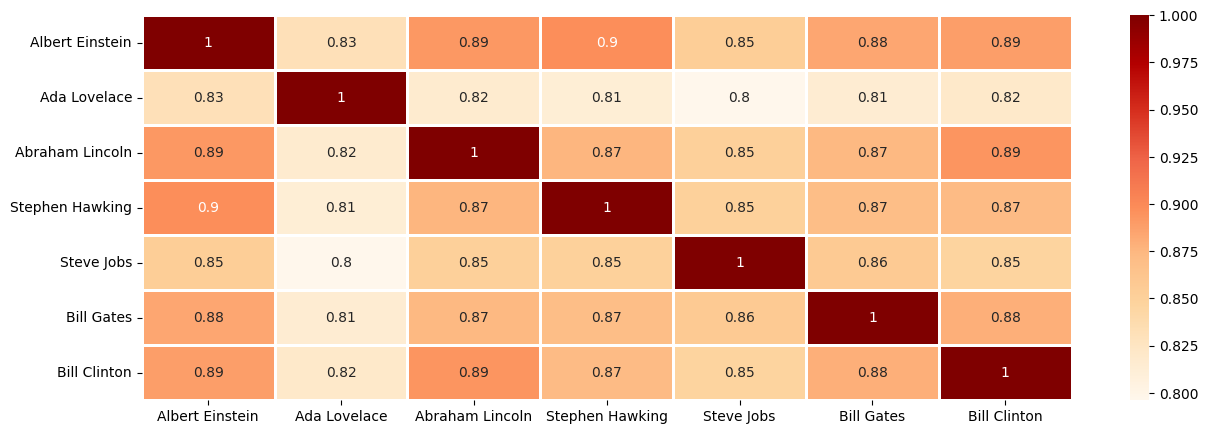

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# show it
plt.figure(figsize=(15,5))
sns.heatmap(
    pairwise_df,
    cmap='OrRd',
    linewidth=1,
    annot=True
)

# Exercise 1

In the first block, uncomment this code:

> `# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]`

to get the full text from each wikipedia entry, not just a summary.

**Questions**:
1. What do you notice in the pairwise similarities?
2. Why is this happening?

# Exercise 2

We will remedy what you noticed before.

1. How can we do it?
2. How does the new pairwise matrix look like now?